In [21]:
import sys
sys.dont_write_bytecode = True

from typing import Callable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from lib.gradient_descent import descenso_gradiente_multi
from lib.utils import print_result

pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(formatter={'float_kind': lambda x: '%.4f' % x})

%matplotlib inline

In [2]:
dataset = pd.read_csv('./data/titanic.csv')
dataset = dataset[dataset['Age'].notna()]

dataset['Age'] = (
    dataset['Age'] - dataset['Age'].mean()
) / dataset['Age'].std()

dataset['Fare'] = (
    dataset['Fare'] - dataset['Fare'].mean()
) / dataset['Fare'].std()

dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.5300,1,0,A/5 21171,-0.5186,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.5714,1,0,PC 17599,0.6914,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.2546,0,0,STON/O2. 3101282,-0.5059,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.3649,1,0,113803,0.3478,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.3649,0,0,373450,-0.5035,NaN,S


In [3]:
x = dataset[['Age', 'Fare']].to_numpy()
y = dataset[['Survived']].to_numpy()

In [4]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))
h = lambda theta, x: sigmoid(np.dot(x, theta))
def j (theta, x, y): 
    m = x.shape[0]
    p = h(theta, x)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p)) / m

In [5]:
result = descenso_gradiente_multi(
    x,
    y,
    fn = h,
    cost_fn = j,
    alpha = 0.1,
    error = 0.0001,
    max_iter = 10000
)

In [6]:
print_result('Logistic Regression', result)

Method: Logistic Regression [iters: 120, thetas: [-0.2238 -0.1677 1.0237], error: 0.000097]


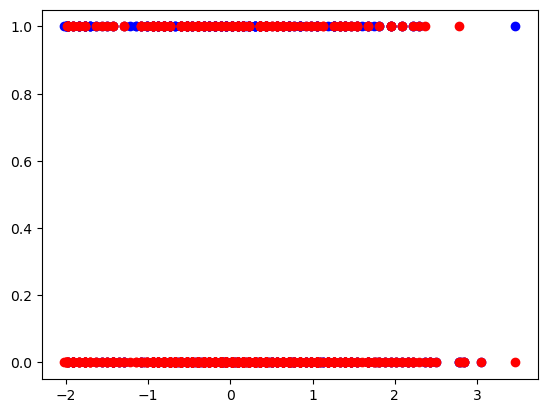

In [36]:
x_p = np.column_stack((np.ones(x.shape[0]), x))
res = np.rint(h(result['theta'], x_p)).astype(int)

plt.scatter(x[:, 0], y, color = 'blue')
plt.scatter(x[:, 0], res, color = 'red')
plt.show()